In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Fraud.csv")

## Initial Dataset

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


##Data Description

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
print(f'There are {df.shape[1]} columns and {df.shape[0]} instances in the dataseet')

There are 11 columns and 151799 instances in the dataseet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151799 entries, 0 to 151798
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151799 non-null  int64  
 1   type            151799 non-null  object 
 2   amount          151799 non-null  float64
 3   nameOrig        151799 non-null  object 
 4   oldbalanceOrg   151799 non-null  float64
 5   newbalanceOrig  151798 non-null  float64
 6   nameDest        151798 non-null  object 
 7   oldbalanceDest  151798 non-null  float64
 8   newbalanceDest  151798 non-null  float64
 9   isFraud         151798 non-null  float64
 10  isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.7+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,151799.000000,1.517990e+05,1.517990e+05,1.517980e+05,1.517980e+05,1.517980e+05,151798.000000,151798.0
mean,9.333902,1.791774e+05,8.879109e+05,9.043402e+05,9.137641e+05,1.180076e+06,0.000863,0.0
std,1.906281,3.401606e+05,2.807531e+06,2.844268e+06,2.384389e+06,2.705635e+06,0.029364,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.111398e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.122687e+04,1.999000e+04,0.000000e+00,3.164400e+04,9.332977e+04,0.000000,0.0
75%,11.000000,2.230398e+05,1.956685e+05,2.262719e+05,6.869059e+05,1.120989e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.490552e+07,3.894623e+07,1.000000,0.0


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

The dataset has only one null values in seven of the columns. This is very less compared to total number of instances so we can directly delete them

In [8]:
Not_fraud = df['isFraud'].value_counts()[0]
Fraud = df['isFraud'].value_counts()[1]
print(f'Total Not Fraud Instances =  {Not_fraud}\nTotal Fraud Instamces = {Fraud}')

Total Not Fraud Instances =  151667
Total Fraud Instamces = 131


In [9]:
df['isFlaggedFraud'].value_counts()

0.0    151798
Name: isFlaggedFraud, dtype: int64

In [10]:
Not_fraud = df['isFlaggedFraud'].value_counts()[0]
print(f'Total Not Flagged Fraud Instances =  {Not_fraud}\nTotal Flagged Fraud Instamces = {Fraud}')

Total Not Flagged Fraud Instances =  151798
Total Flagged Fraud Instamces = 131


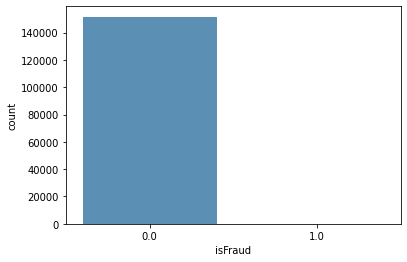

In [11]:
df['isFraud'].value_counts()
sns.countplot(x='isFraud',data=df,alpha=0.8)
plt.show()

In [12]:
df['type'].value_counts()

PAYMENT     57889
CASH_OUT    48858
CASH_IN     30820
TRANSFER    12851
DEBIT        1381
Name: type, dtype: int64

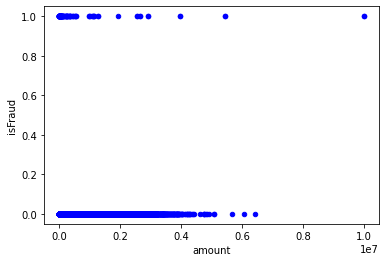

In [15]:
df.plot.scatter(x='amount',y='isFraud',c='blue')

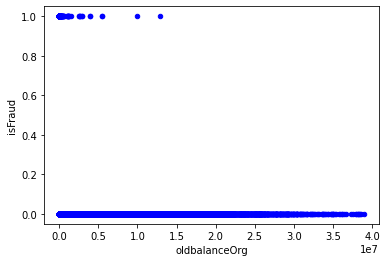

In [16]:
df.plot.scatter(x='oldbalanceOrg',y='isFraud',c='blue')

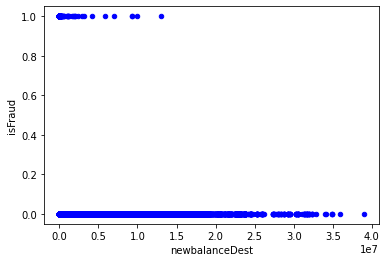

In [17]:
df.plot.scatter(x='newbalanceDest',y='isFraud',c='blue') 	

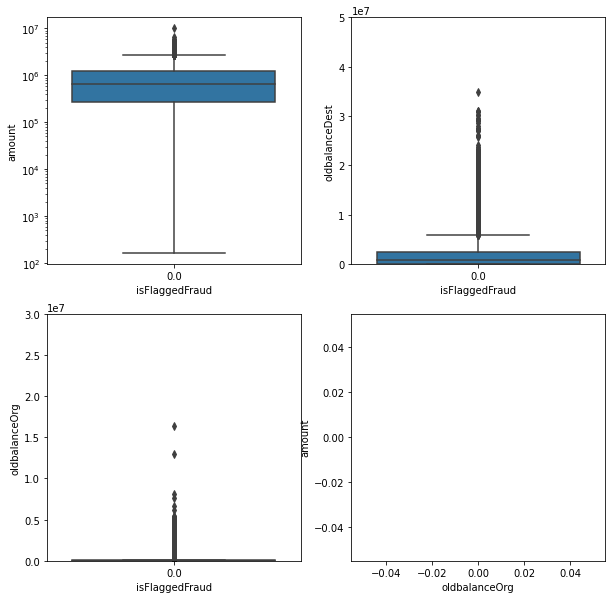

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0, 0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrg', data=tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0, 3e7))
d = sns.regplot(x = 'oldbalanceOrg', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :], ax=axs[1][1])
plt.show()

Dropping the unneccessary columns

In [20]:
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [21]:
df.shape

(151799, 9)

In [22]:
print('\n The types of fraudulent transactions are {}'.format(\
list(df.loc[df.isFraud == 1].type.drop_duplicates().values))) 


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [23]:
fraud_transfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
fraud_cashout =  df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]


In [24]:
print(f'Number of fraud transfer is {len(fraud_transfer)} and cash out transfer is  {len(fraud_cashout)}')


Number of fraud transfer is 65 and cash out transfer is  66


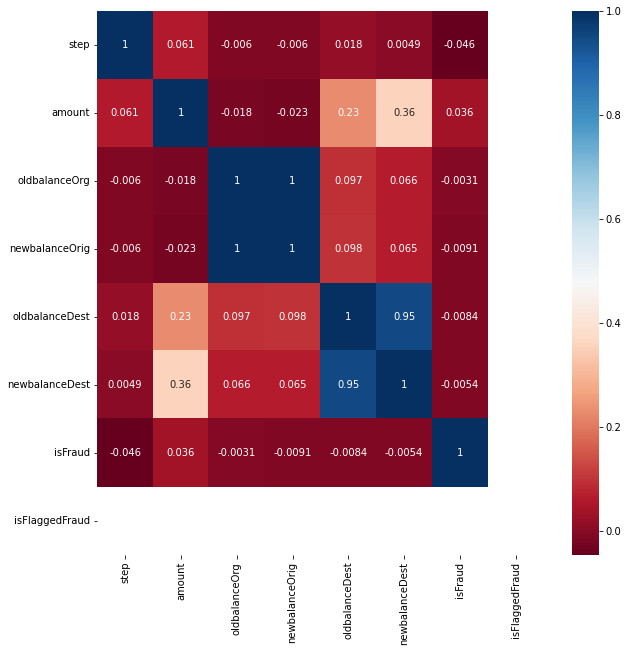

In [25]:
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='RdBu')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Ques . What are the key factors that predict fraudulent customer


Ans. According to the Heatmap the key factor thatpredict fraudulent customer are AMount, oldbalanceOrig, newbalnceDest and isFlaggedFraud

Ques . Do these factors make sense? If yes, How? If not, How not?

Ans. Yes These factor makes sense as the transaction amount and Amount remained after transaction can influence the probability of fraud transactions

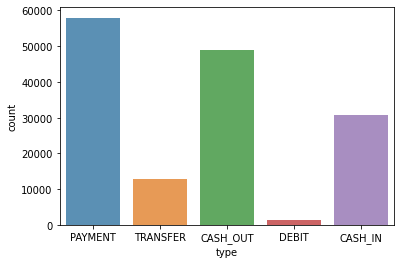

In [26]:
df.type.value_counts()
sns.countplot(x='type',data=df,alpha=0.8)
plt.show()

The Plot shows count of transactions in differnt types

##Dropping the null rows

In [27]:
df = df.dropna("rows")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


In [28]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#one-hot encoding

Encoding the type attribute as it is an object feature. Here we are using one-hot encoding

In [29]:
type_encoded = pd.get_dummies(df['type'])
type_encoded

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
151793,0,0,0,1,0
151794,0,0,0,1,0
151795,0,0,0,1,0
151796,0,0,0,1,0


In [30]:
df = pd.merge(left = df,
              right = type_encoded,
              left_index = True,
              right_index = True)

In [31]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0,0,0,1,0


In [32]:
df.shape

(151798, 14)

In [33]:
ss = StandardScaler()

df.amount         = ss.fit_transform(df[['amount']])
df.oldbalanceOrg  = ss.fit_transform(df[['oldbalanceOrg']])
df.oldbalanceDest = ss.fit_transform(df[['oldbalanceDest']])
df.newbalanceOrig = ss.fit_transform(df[['newbalanceOrig']])
df.newbalanceDest = ss.fit_transform(df[['newbalanceDest']])

In [34]:
df['type']

0          PAYMENT
1          PAYMENT
2         TRANSFER
3         CASH_OUT
4          PAYMENT
            ...   
151793     PAYMENT
151794     PAYMENT
151795     PAYMENT
151796     PAYMENT
151797     PAYMENT
Name: type, Length: 151798, dtype: object

In [35]:
X = np.array(df[["CASH_IN",	"CASH_OUT","DEBIT","PAYMENT","TRANSFER", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[['isFraud']])

#Logistic Regression Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss

In [37]:
X.shape,y.shape

((151798, 8), (151798, 1))

In [38]:
X

array([[ 0.        ,  0.        ,  0.        , ..., -0.49782101,
        -0.25566266, -0.26159505],
       [ 0.        ,  0.        ,  0.        , ..., -0.5212669 ,
        -0.30869397, -0.31113754],
       [ 0.        ,  0.        ,  0.        , ..., -0.52621539,
        -0.31619807, -0.31795293],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.50578346,
        -0.06428318, -0.07173456],
       [ 0.        ,  0.        ,  0.        , ..., -0.51830782,
        -0.06682318, -0.07274391],
       [ 0.        ,  0.        ,  0.        , ..., -0.47420461,
        -0.06784574, -0.07902779]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [40]:
X_train.shape

(106258, 8)

In [41]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [42]:
y_pred = model.predict(X_test)
score = metrics.accuracy_score(y_test,y_pred)
score

0.9992314448836188

In [44]:
 from sklearn.ensemble import RandomForestClassifier

In [45]:
model = RandomForestClassifier()
model.fit(X,y)
RandomForestClassifier(...)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=Ellipsis)

In [46]:
y_pred = model.predict(X_test)

##ANN Model

In [48]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=8, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                225       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))

In [50]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3401/3401 [==============================] - 8s 2ms/step - loss: 0.0147 - val_loss: 0.0083
Epoch 2/20
3401/3401 [==============================] - 8s 2ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 3/20
3401/3401 [==============================] - 10s 3ms/step - loss: 0.0054 - val_loss: 0.0056
Epoch 4/20
3401/3401 [==============================] - 6s 2ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 5/20
3401/3401 [==============================] - 6s 2ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 6/20
3401/3401 [==============================] - 7s 2ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 7/20
3401/3401 [==============================] - 6s 2ms/step - loss: 0.0051 - val_loss: 0.0052
Epoch 8/20
3401/3401 [==============================] - 7s 2ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 9/20
3401/3401 [==============================] - 6s 2ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 10/20
3401/3401 [==============================] - 7s 2ms/step - loss: 0.0050 - val_lo

In [70]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

1.0

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [63]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [64]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [65]:
train_classifier(svc,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.999187527448397, 0.0)

In [66]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  SVC
Accuracy -  0.999187527448397
Precision -  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


For  KN
Accuracy -  0.998989898989899
Precision -  0.14285714285714285
For  DT
Accuracy -  0.9992314448836188
Precision -  0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  LR
Accuracy -  0.9992094861660079
Precision -  0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For  RF
Accuracy -  0.9992534036012297
Precision -  0.5833333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  AdaBoost
Accuracy -  0.9992314448836188
Precision -  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  BgC
Accuracy -  0.9992094861660079
Precision -  0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For  ETC
Accuracy -  0.9992753623188406
Precision -  0.5882352941176471


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  GBDT
Accuracy -  0.9992314448836188
Precision -  0.5555555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For  xgb
Accuracy -  0.9992314448836188
Precision -  1.0


In [67]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [68]:
performance_df

,Algorithm,Accuracy,Precision
5,AdaBoost,0.999231,1.000000
9,xgb,0.999231,1.000000
2,DT,0.999231,0.666667
7,ETC,0.999275,0.588235
4,RF,0.999253,0.583333
8,GBDT,0.999231,0.555556
3,LR,0.999209,0.500000
6,BgC,0.999209,0.500000
1,KN,0.998990,0.142857
0,SVC,0.999188,0.000000


saving the best model: Adaboost and xgb

In [69]:
import pickle

pickle.dump(abc,open('adaboost_model.pkl','wb'))
pickle.dump(xgb,open('xgb_model.pkl','wb'))

In [71]:
pickle.dump(model,open('ann_model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://5cfc0d40-abd0-4090-a7f4-d0b044411b4a/assets
